In [67]:
import saltproc
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [3]:
res = saltproc.Results('saltproc_runtime/saltproc_results.h5')

### Get the material added at each timestep

In [86]:
bds_idx = []
eds_idx = []
for t in res.time_at_eds:
    b_idx = np.where(res.time_total == t)[0][0]
    e_idx = np.where(res.time_total == t)[0][1]
    bds_idx += [b_idx]
    eds_idx += [e_idx]

In [103]:
u233_bds = res.get_nuclide_mass('fuel', 'U233', bds_idx)
u233_eds = res.get_nuclide_mass('fuel', 'U233', eds_idx)
u233_feed = u233_eds - u233_bds

th232_bds = res.get_nuclide_mass('fuel', 'Th232', bds_idx)
th232_eds = res.get_nuclide_mass('fuel', 'Th232', eds_idx)
th232_feed = th232_eds - th232_bds

### Calculate the time derivative

In [122]:
du233_dt = np.diff(u233_feed) / np.diff(res.time_at_eds[0:])

dth232_dt = np.diff(th232_feed) / np.diff(res.time_at_eds[0:])

$\frac{dN(t)}{dt} / N(t) = -\lambda$ 

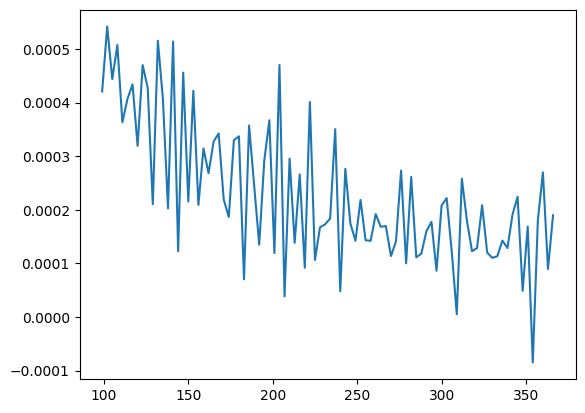

In [192]:
i = 31
plt.plot(res.time_at_eds[1 + i:], du233_dt[i:] / u233_feed[1 + i:])

In [178]:
np.median(du233_dt/u233_feed[1:])**-1

3707.5026447685136

In [193]:
i = 31
np.mean(du233_dt[i:]/u233_feed[1+i:])**-1

4333.791034597406

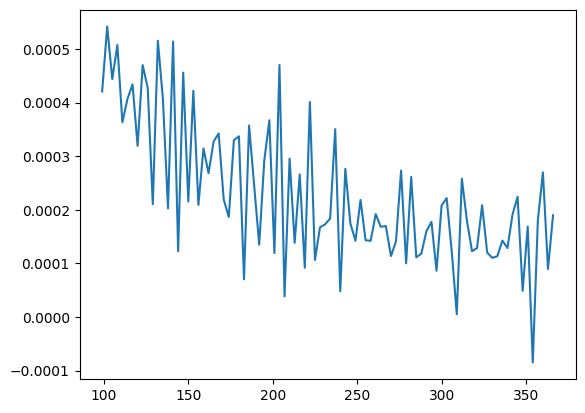

In [194]:
i=31
plt.plot(res.time_at_eds[1 + i:], dth232_dt[i:] / th232_feed[1 + i:])

In [182]:
np.median(dth232_dt/th232_feed[1:])**-1

3707.502643666326

In [195]:
i = 31
np.mean(dth232_dt[i:]/th232_feed[1+i:])**-1

4333.791034537398